# Handwritten Digit Recognition

##  Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

c:\Users\Nasrullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Load and Preprocess Data

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Data loaded and normalized successfully.")
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Data loaded and normalized successfully.
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


## Define Model Architecture

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # Input Layer
    tf.keras.layers.Dense(128, activation='relu'),    # Hidden Layer
    tf.keras.layers.Dropout(0.2),                     # Regularization
    tf.keras.layers.Dense(10, activation='softmax')   # Output Layer
])

model.summary()

c:\Users\Nasrullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [5]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9078 - loss: 0.3134 - val_accuracy: 0.9677 - val_loss: 0.1200
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9549 - loss: 0.1512 - val_accuracy: 0.9745 - val_loss: 0.0925
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9651 - loss: 0.1140 - val_accuracy: 0.9760 - val_loss: 0.0782
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9722 - loss: 0.0915 - val_accuracy: 0.9793 - val_loss: 0.0689
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9762 - loss: 0.0769 - val_accuracy: 0.9817 - val_loss: 0.0661


## Evaluate Model Performance

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

Final Test Accuracy: 97.57%


## Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


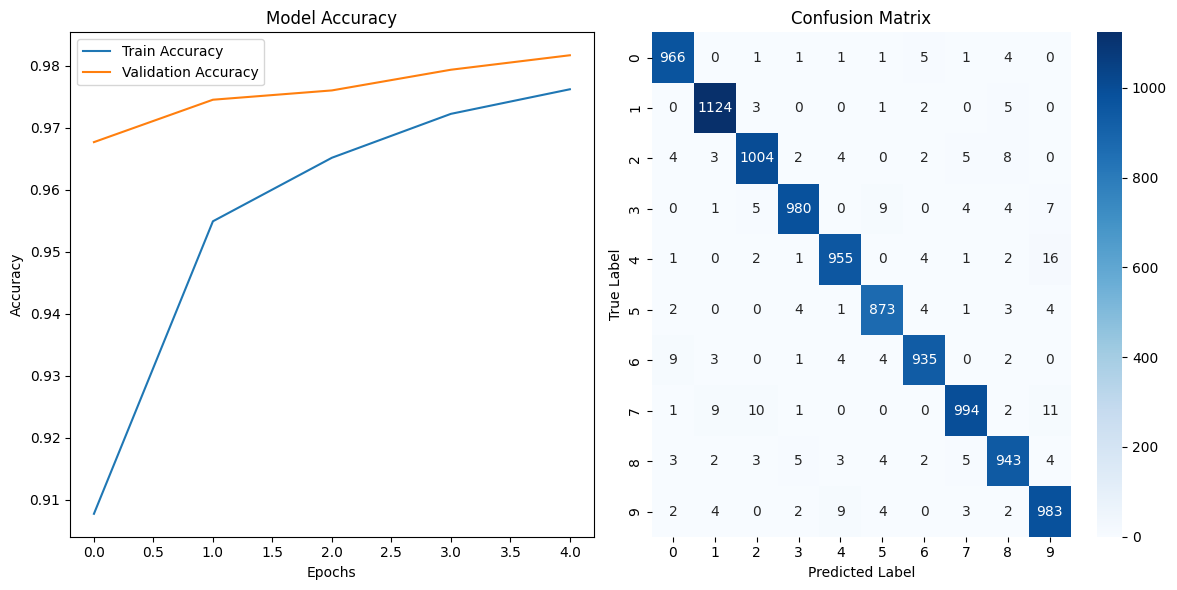

In [7]:
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

## Save the Model

In [8]:
model.save('mnist_digit_recognizer.keras')
print("Model saved successfully.")

Model saved successfully.
